In [ ]:
# importar pacotes e setar configurações de plots
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from csv import reader
from pandas import DataFrame                      # Selecionar o melhor modelo
import pmdarima as pm
from pmdarima.model_selection import RollingForecastCV
from pmdarima.arima import auto_arima   

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [326]:
import csv
with open(r"C:\Users\Guilh\OneDrive\UNESP\UNESP\Análise de Séries Temporais\Material\ipeadata.csv","r") as df:
    reader= csv.reader(df, delimiter=',')
    for linha in reader:
        print (linha)
        df=DataFrame(reader, columns=['Meses','Consumo'])


['Data', 'Consumo ']


In [278]:
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 6 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Meses   54 non-null     object
dtypes: object(1)
memory usage: 564.0+ bytes


In [327]:
df.head()

,Meses,Consumo
0,2015-01,13831
1,2015-02,14420
2,2015-03,14647
3,2015-04,14582
4,2015-05,14250


In [306]:
df.tail()

,Meses,Consumo
70,2020-11,14672
71,2020-12,14589
72,2021-01,14622
73,2021-02,14354
74,2021-03,15685


In [328]:
df.Consumo=df.Consumo.astype(int) # Transformando em inteiro
df.Meses=pd.to_datetime(df.Meses)   # Transformando linhas em meses
df.head()

,Meses,Consumo
0,2015-01-01,13831
1,2015-02-01,14420
2,2015-03-01,14647
3,2015-04-01,14582
4,2015-05-01,14250


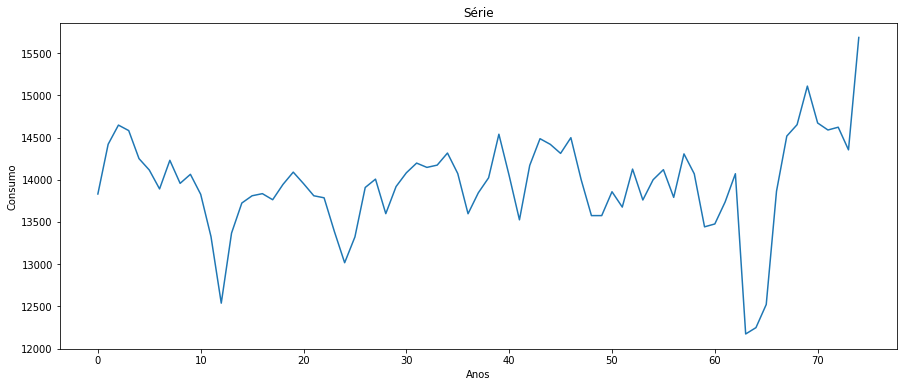

In [329]:
df.Consumo.plot(figsize=(15,6)) # Gráfico da série
plt.xlabel('Anos')
plt.ylabel('Consumo')
plt.title('Série')
plt.show()

In [308]:
df.Consumo=df.Consumo.astype(int) # Transformando em inteiro
df.Meses=pd.to_datetime(df.Meses)   # Transformando linhas em meses
df.head()

,Meses,Consumo
0,2015-01-01,13831
1,2015-02-01,14420
2,2015-03-01,14647
3,2015-04-01,14582
4,2015-05-01,14250


In [333]:
serie=df[0:66]
serie.set_index('Meses',inplace=True) # Conversão dos meses em índice
serie.head()

,Consumo
Meses,
2015-01-01,13831
2015-02-01,14420
2015-03-01,14647
2015-04-01,14582
2015-05-01,14250


In [334]:
serie.tail()

,Consumo
Meses,
2020-02-01,13736
2020-03-01,14071
2020-04-01,12173
2020-05-01,12248
2020-06-01,12522


In [7]:
media=round(serie['Consumo'].mean(),2)
variancia=round(serie['Consumo'].var(),2)
print(media,variancia)

13846.91 254028.36


In [335]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2015-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Consumo  66 non-null     int32
dtypes: int32(1)
memory usage: 792.0 bytes


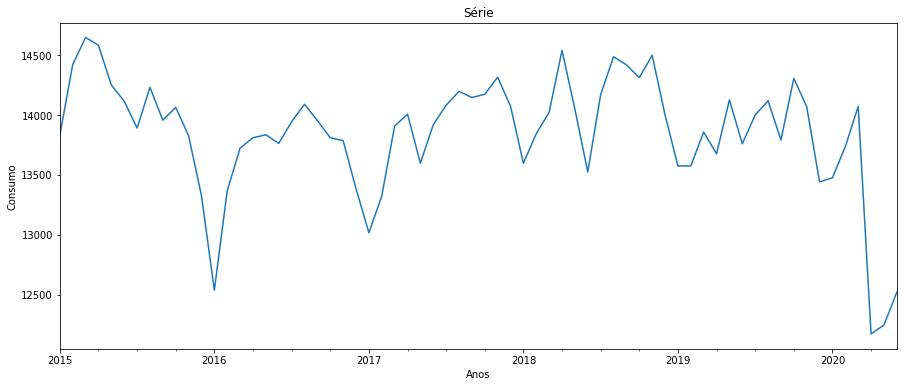

In [336]:
serie.Consumo.plot(figsize=(15,6)) # Gráfico da série
plt.xlabel('Anos')
plt.ylabel('Consumo')
plt.title('Série')
plt.show()

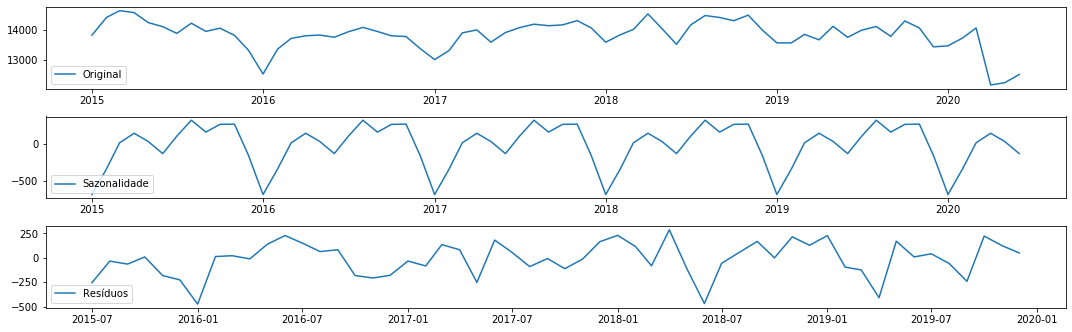

In [414]:
# Decomposição dos Resíduos e da Tendência

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(serie.Consumo) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.subplot(411) 
plt.plot(serie.Consumo, label='Original') 
plt.legend(loc='lower left') 
plt.subplot(412) 
plt.plot(trend, label='Tendência') 
plt.legend(loc='lower left') 
plt.subplot(413) 
plt.plot(seasonal,label='Sazonalidade') 
plt.legend(loc='lower left') 
plt.subplot(414) 
plt.plot(residual, label='Resíduos') 
plt.legend(loc='lower left') 
plt.tight_layout()

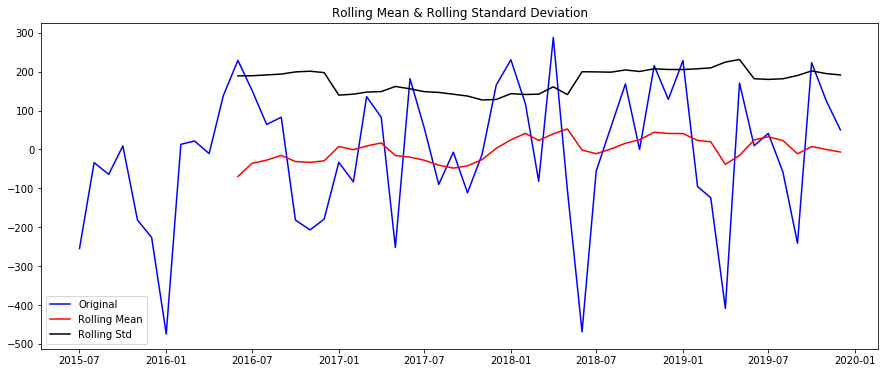

In [37]:
# Médias e Desvios Móveis e Resíduos
consumo_decompose = residual 
rolling_mean = residual.rolling(window = 12).mean() # Médias Móveis com janela de 12 meses
rolling_std = residual.rolling(window = 12).std()   # Desvios-padrões Móveis
plt.figure(figsize=(15, 6))
plt.plot(residual, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc='lower left')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [344]:
ts.head()

,Resíduos
Meses,
2015-07-01,-254.942361
2015-08-01,-33.892361
2015-09-01,-64.100694
2015-10-01,9.049306
2015-11-01,-181.650694


In [252]:
serie_decomp = residual.dropna(axis=0, how='all') # Indexando os resíduos
ts=DataFrame(serie_decomp)  

Meses
2015-07-01   -254.942361
2015-08-01    -33.892361
2015-09-01    -64.100694
2015-10-01      9.049306
2015-11-01   -181.650694
Name: resid, dtype: float64

In [ ]:
serie.decomp = residual.dropna(axis=0, how='all')

In [260]:
ts=DataFrame(serie_decomp)          # ts -> Nova série decomposta
ts.columns=['Resíduos']                
ts.head()

,Resíduos
Meses,
2015-07-01,-254.942361
2015-08-01,-33.892361
2015-09-01,-64.100694
2015-10-01,9.049306
2015-11-01,-181.650694


In [249]:
ts.head()

,Resíduos
Meses,
2015-07-01,-254.942361
2015-08-01,-33.892361
2015-09-01,-64.100694
2015-10-01,9.049306
2015-11-01,-181.650694


In [417]:
# KPSS test para os Resíduos
def kpss_test(ts, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(ts, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The serie is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(ts)

KPSS Statistic: 0.33995626147323393
p-value: 0.1
num lags: 11
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The serie is stationary


C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [483]:
# KPSS test para os dados originais
def kpss_test(serie, **kw):     
    statistic, p_value, n_lags, critical_values = kpss(serie, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The serie is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(serie)

KPSS Statistic: 0.18699097888302557
p-value: 0.1
num lags: 11
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The serie is stationary


C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [418]:
# Dickey-Fuller para os resíduos
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The serie is {"not " if result[1] > 0.05 else ""}stationary')

ADF Statistic: -5.910124
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Result: The serie is stationary


In [482]:
# Dickey-Fuller para a Série
result = adfuller(serie.Consumo)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The serie is {"not " if result[1] > 0.05 else ""}stationary')

ADF Statistic: -3.093429
p-value: 0.027043
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
Result: The serie is stationary


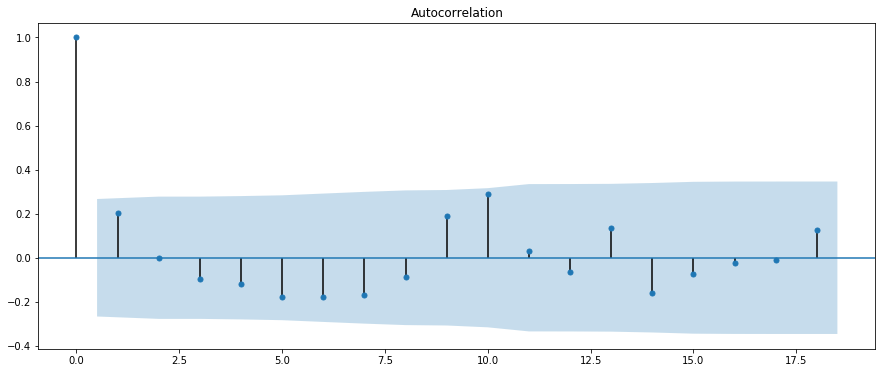

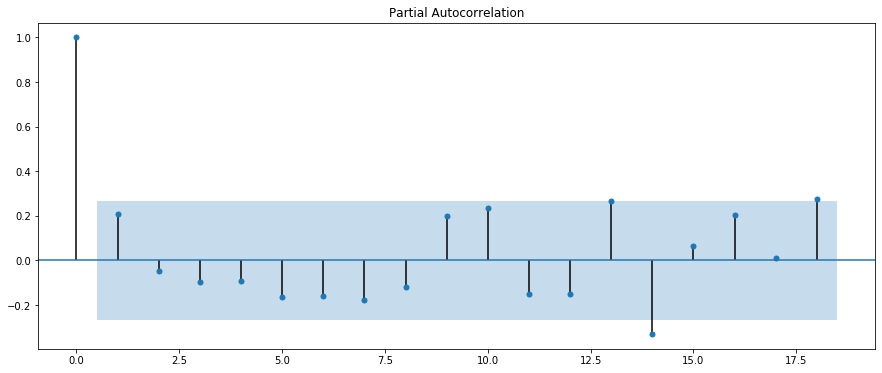

In [424]:
# Autocorrelação e Autocorrelação Parcial dos Resíduos
plot_acf(ts)
plot_pacf(ts)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

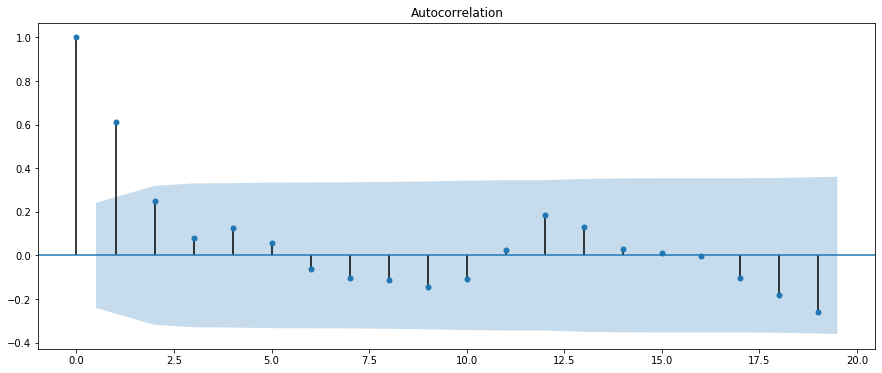

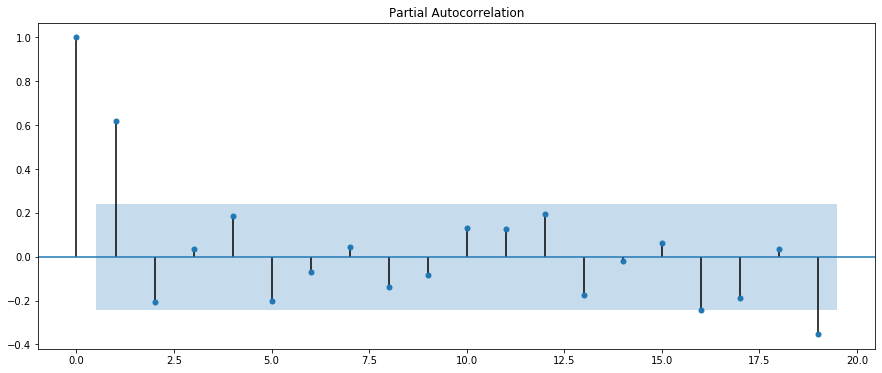

In [481]:
# Autocorrelação e Autocorrelação Parcial da Série
plot_acf(serie.Consumo)
plot_pacf(serie.Consumo)
plt.show

In [435]:
# auto_arima para o modelo ARIMA
arima_model= auto_arima(ts, start_p=0, d=0, start_q=1, max_p=5, max_d=5, max_q=5, alpha=0.05, test='kpss',
                        start_P=1, D=0, start_Q=1, max_P=5, max_Q=5, return_valid_fits=True,
                        error_action='warn', trace=True, supress_warnings=True,
                        random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.510, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=714.884, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=714.550, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=713.150, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.483, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.361 seconds


In [ ]:
# auto_arima para o modelo SARIMA
arima_model= auto_arima(serie.Consumo, start_p=1, d=0, start_q=0, max_p=5, max_d=5, max_q=5, alpha=0.05, test='kpss',
                        start_P=1, D=0, start_Q=1, max_P=5, max_Q=5, m=12,
                        seasonal=True, seasonal_test='ocsb', return_valid_fits=True,
                        error_action='warn', trace=True, supress_warnings=True,
                        random_state=20, n_fits=50)

In [486]:
# Definindo o modelo ARIMA (0,0,1) e encontrando seus parâmentros
arima= ARIMA(serie, freq='MS', order=(0,0,1)).fit()
arima.summary()

C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Consumo   No. Observations:                   66
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -489.377
Date:                Sun, 01 Aug 2021   AIC                            984.755
Time:                        20:46:47   BIC                            991.324
Sample:                    01-01-2015   HQIC                           987.351
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.384e+04    103.057    134.339      0.000    1.36e+04     1.4e+04
ma.L1          0.5954      0.115      5.181      0.000       0.370       0.821
sigma2        1.6e+05   1.97e+04      8.134      0.000    1.21e+05    1.99e+05
===================================================================================
Ljung-Box (Q):                       49.53   Jarque-Bera (JB):               108.10
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                            -1.71
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [485]:
# Definindo o modelo SARIMA(1,0,0)(0,0,1) com s=12 e encontrando seus parâmentros
sarima = sm.tsa.statespace.SARIMAX(serie,order=(1, 0, 0),seasonal_order=(0, 0, 1, 12),enforce_stationarity=False,
                                   enforce_invertibility=False)
results = sarima.fit()
results.summary()

C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Guilh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              Consumo   No. Observations:                   66
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -391.625
Date:                              Sun, 01 Aug 2021   AIC                            789.250
Time:                                      20:46:13   BIC                            795.161
Sample:                                  01-01-2015   HQIC                           791.523
                                       - 06-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9985      0.008    127.845      0.000       0.983       1.014
ma.S.L12       0.5472      0.304      1.797      0.072      -0.050       1.144
sigma2      1.697e+05   4.58e+04      3.702      0.000    7.98e+04     2.6e+05
===================================================================================
Ljung-Box (Q):                       36.46   Jarque-Bera (JB):                75.41
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.27   Skew:                            -1.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [458]:
# Teste do Ljung-Box e Box-Pierce -> MODELO ARIMA
sm.stats.acorr_ljungbox(arima.resid, lags=[36], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
36,43.166905,0.191672,30.819385,0.713253


In [487]:
# Teste do Ljung-Box e Box-Pierce -> MODELO SARIMA
sm.stats.acorr_ljungbox(results.resid, lags=[36], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
36,1.524683,1.0,1.112159,1.0


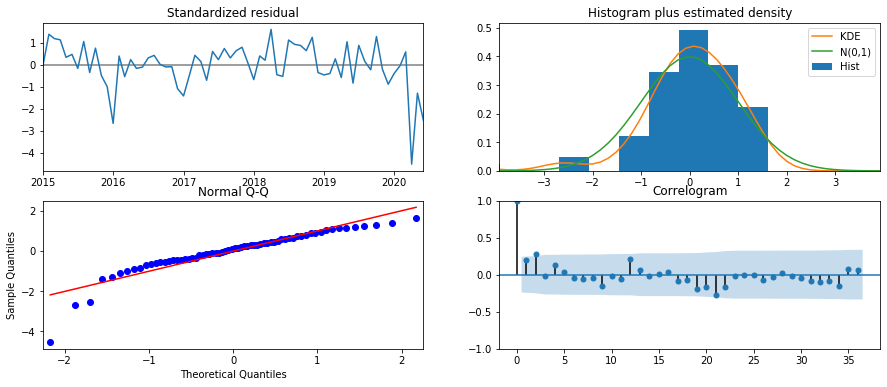

In [385]:
# GráficoS do modelo ARIMA
arima.plot_diagnostics(lags=36,figsize=(15,6))
plt.show()

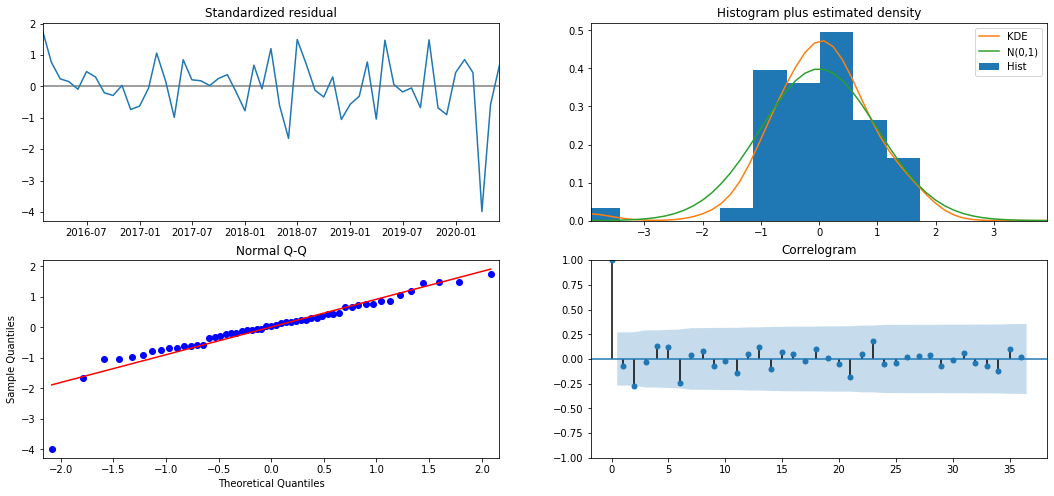

In [448]:
# Gráficos do modelo SARIMA
results.plot_diagnostics(figsize=(18, 8),lags=36)
plt.show()

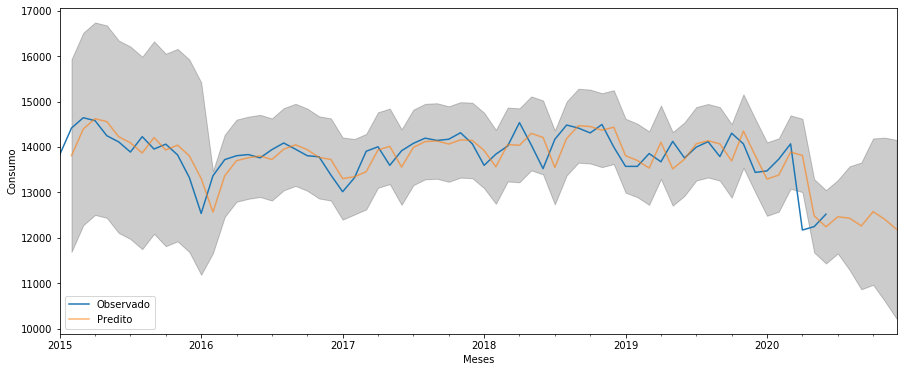

In [475]:
# Previsão SARIMA pelo método One-Step Ahead Forecast
predsarima = results.get_prediction(start=('2015-02-01'),end=('2020-12-01'),dynamic=False)
pred_cisarima = predsarima.conf_int()
ax = serie.Consumo['2015-01-01':'2020-06-01'].plot(label='Observado')
predsarima.predicted_mean.plot(ax=ax, label='Predito', alpha=.6, figsize=(15, 6))
ax.fill_between(pred_cisarima.index,
                pred_cisarima.iloc[:, 0],
                pred_cisarima.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Meses')
ax.set_ylabel('Consumo')
plt.legend(loc='lower left')
plt.show()

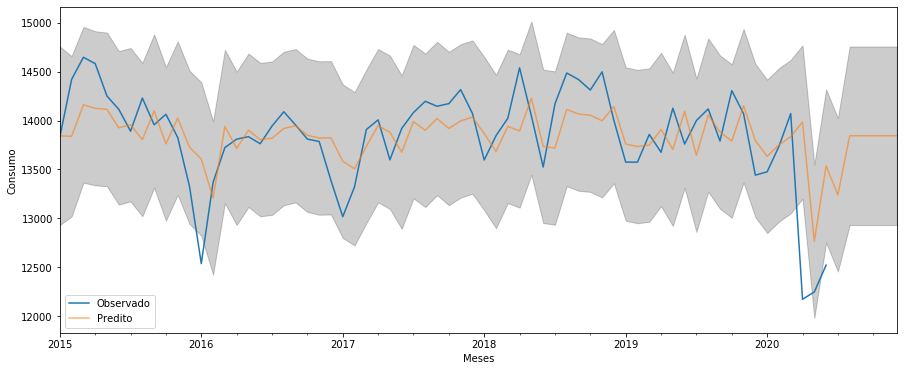

In [476]:
# Previsão ARIMA pelo método One-Step Ahead Forecast
predarima = arima.get_prediction(start=('2015-01-01'),end=('2020-12-01'),dynamic=False)
pred_ciarima = predarima.conf_int()
ax = serie.Consumo['2015-01-01':'2020-06-01'].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Predito', alpha=.6, figsize=(15, 6))
ax.fill_between(pred_ciarima.index,
                pred_ciarima.iloc[:, 0],
                pred_ciarima.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Meses')
ax.set_ylabel('Consumo')
plt.legend(loc='lower left')
plt.show()

In [405]:
# Conversão dos meses em índice
df.set_index('Meses',inplace=True) 
df.Consumo['2020-07-01':'2020-12-01']

Meses
2020-07-01    13864
2020-08-01    14517
2020-09-01    14652
2020-10-01    15109
2020-11-01    14672
2020-12-01    14589
Name: Consumo, dtype: int32

In [477]:
predsarima.predicted_mean['2020-07-01':'2020-12-01'].astype(int)

2020-07-01    12463
2020-08-01    12434
2020-09-01    12263
2020-10-01    12578
2020-11-01    12406
2020-12-01    12185
Freq: MS, dtype: int32

In [478]:
predarima.predicted_mean['2020-07-01':'2020-12-01'].astype(int)

2020-07-01    13240
2020-08-01    13844
2020-09-01    13844
2020-10-01    13844
2020-11-01    13844
2020-12-01    13844
Freq: MS, dtype: int32

In [410]:
ysarima_estimado = predsarima.predicted_mean['2020-07-01':'2020-12-01']
ysarima_observado = df.Consumo['2020-07-01':'2020-12-01']
mse_sarima = ((ysarima_estimado - ysarima_observado) ** 2).mean()
print('O Erro Quadrático Médio é {}'.format(round(mse_sarima, 2)))
print('A Raiz do Erro Quadrático Médio é {}'.format(round(np.sqrt(mse_sarima), 2)))

O Erro Quadrático Médio é 4885946.23
A Raiz do Erro Quadrático Médio é 2210.42


In [409]:
yarima_estimado = predarima.predicted_mean['2020-07-01':'2020-12-01']
yarima_observado = df.Consumo['2020-07-01':'2020-12-01']
mse_arima = ((yarima_estimado - yarima_observado) ** 2).mean()
print('O Erro Quadrático Médio é {}'.format(round(mse_arima, 2)))
print('A Raiz do Erro Quadrático Médio é {}'.format(round(np.sqrt(mse_arima), 2)))

O Erro Quadrático Médio é 721693.37
A Raiz do Erro Quadrático Médio é 849.53


In [479]:
# Intervalo de confiança SARIMA
pred_cisarima['2020-07-01':'2020-12-01'].astype(int) 

,lower Consumo,upper Consumo
2020-07-01,11655,13271
2020-08-01,11292,13576
2020-09-01,10866,13661
2020-10-01,10966,14190
2020-11-01,10604,14207
2020-12-01,10213,14157


In [480]:
# Intervalo de confiança ARIMA
pred_ciarima['2020-07-01':'2020-12-01'].astype(int) 

,lower Consumo,upper Consumo
2020-07-01,12456,14024
2020-08-01,12932,14756
2020-09-01,12932,14756
2020-10-01,12932,14756
2020-11-01,12932,14756
2020-12-01,12932,14756
